# Final Exam - Lujia Wu

### Introduction:

**Context:**
- Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

**Objective:**
- To perform descriptive analysis on diabetic patients. 

**Data Description:**
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skinfold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
8. Age: Age in years
9. Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

#### Mining Questions: Place your answer here after every question. (56 pt)
1. Have you noticed any false (unrealistic) information about some variables in their statistical summary?
   - If yes, what is it that doesn't make sense?
  
**Answer: Yes, Glucose, BloodPressure, SkinThickness, Insulin, and BMI had minimum values of 0 before replacement. These 0 were likely due to missing value coding or entry errors, as real-world physiological measurements cannot be zero for these variables.**

   - What is your suggestion about fixing the issue?

**Answer:**
1.  Replace all zero values with the median of each variable(Like Question 14)
2.  Check for outliers in variables.
3.  Consider standardization or normalization for future analysis.
4.  Review other potential data entry errors using boxplots or the IQR method.
---

2. According to this dataset, which 3 variables have the most effect in causing a person to become diabetic?

**Answer:**
Based on the correlation heatmap (Question 15), the three most correlated variables with Class (Diabetes) are:
1. Glucose（0.49）
2. BMI（0.31）
3. Age（0.24）
---

3. How many people in this dataset have skin thickness that is more than 80mm?

**Answer: This is 1 people.**

---
4. Do we need to perform any analysis on the "object dtype" variables in this dataset?
   - Yes or No. Why?
  
**Answer: **
- No, there are no object dtype variables in this dataset.
- The following is the data set：
  - Pregnancies        int64
  - Glucose            int64
  - BloodPressure      int64
  - SkinThickness      int64
  - Insulin            int64
  - BMI              float64
  - Pedigree         float64
  - Age                int64
  - Class              int64
- All variables are numeric (int64 or float64).

---

5. What is the maximum number of pregnancies in this dataset?

**Answer: 17**
   
   - Which number of pregnancies has the highest number of people in this dataset?

**Answer: 1**

   - What type of skewness is observed in the pregnancies variable?

**Answer: The skewness value is 0.90, which indicates positive skewness (right skew).**

---

6. Considering the BMI variable's mean and median, what type of skewness is expected to be seen in the BMI variable?

**Answer: The mean (32.45) is slightly greater than the median (32.00), indicating positive skewness**


   - Does the plotting of BMI indicate the same type of skewness?

**Answer:**
- Yes，the BMI histogram shows a positive skewness(right skew) distribution.
- Most people have BMI values between 20 and 40, with a few individuals having much higher BMI values up to 67.1, which pulls the distribution’s tail to the right.

---

7. Are most people diabetic in this dataset?

**Answer: NO, because the number of people not diabetes (500) is greater than the number of people with diabetes (268).**

   - How many people are not diabetic in this dataset?

**Answer: 500 people**

#### 1. Importing Libraries (10 pt)

In [1]:
# general libraries
import pandas as pd
import numpy as np


# data visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

# suppressing warnings library 

import warnings
warnings.filterwarnings('ignore')

#### 2. Loading (Reading) Dataset (10 pt)

In [2]:
# load the dataset and name it df
df = pd.read_csv('diabetes.csv')

In [3]:
# create a copy of the df and name it diabetes 
diabetes = df.copy()

#### 3. View the first and the last 5 rows of the dataset (6 pt)

In [4]:
# View the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# View the last 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#### 4. Display 5 attributes of the the dataset (10 pt)

In [6]:
# Columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Class'],
      dtype='object')

In [7]:
# Shape
df.shape

(768, 9)

In [8]:
# size
df.size

6912

In [9]:
# Date Type
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Class              int64
dtype: object

In [10]:
# Number of Dimensions
df.ndim

2

#### 5. Display information of the dataset (9 pt)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 6. Display the statistical summary of the dataset (9 pt)
- Transpose the output

In [12]:
# Display the statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### 7. Examine the missing values and the duplicated rows in the dataset (10 pt)

In [13]:
# Check missing values
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

In [14]:
# Check duplicated rows
df.duplicated().sum()

0

### EDA

#### Univariate Analysis

#### 8. Display data distribution in the Pregnancies Variable (7 pt)
- Use red color for the bars in the plot

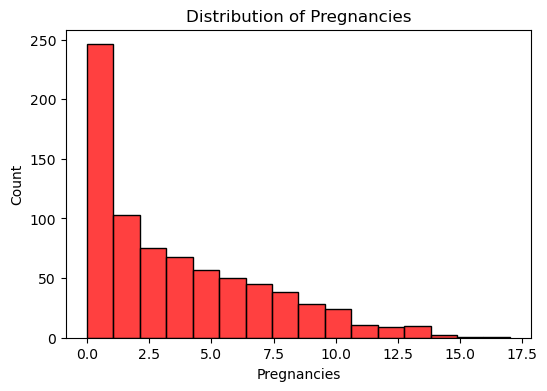

In [15]:
# Display data distribution for Pregnancies using red bars
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Pregnancies', color='red')
plt.title('Distribution of Pregnancies')
plt.show()

#### 9. Display data distribution in the Glucose Variable (7 pt)
- Use green color for the bars in the plot

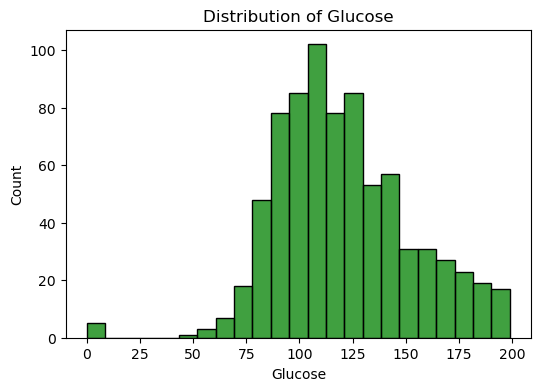

In [16]:
# Display data distribution for Glucose using green bars
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Glucose', color='green')
plt.title('Distribution of Glucose')
plt.show()

#### 10. Display data distribution in the SkinThickness Variable (7 pt)
- Use magenta color for the bars in the plot

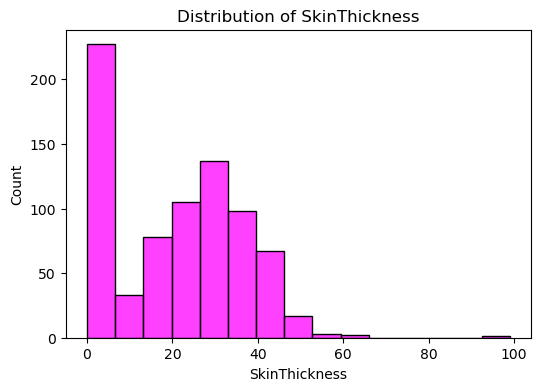

In [17]:
# Display data distribution for SkinThickness using magenta bars
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='SkinThickness', color='magenta')
plt.title('Distribution of SkinThickness')
plt.show()

#### 11. Display data distribution in the BMI Variable (7 pt)
- Use yellow color for the bars in the plot

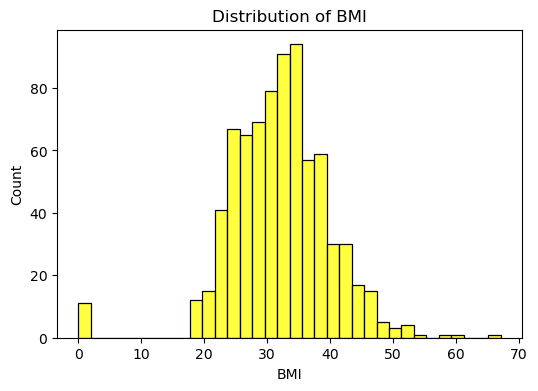

In [18]:
# Display data distribution for BMI using yellow bars
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='BMI', color='yellow')
plt.title('Distribution of BMI')
plt.show()

#### 12. Display data distribution in the Class Variable (7 pt)
- Use blue color for the bars in the plot

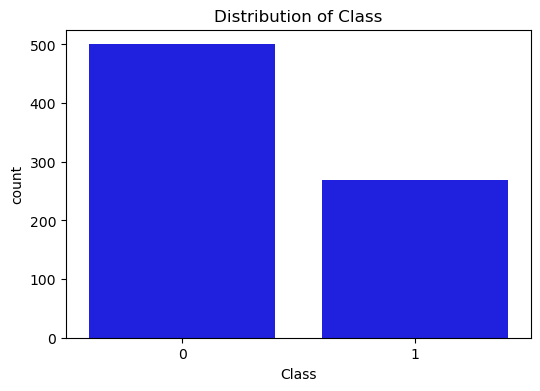

In [19]:
# Display data distribution for Class with blue color
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', color='blue')
plt.title('Distribution of Class')
plt.show()

#### 13. Delete the Pedigree Variable (5 pt)

In [20]:
# Delete the Pedigree variable
df.drop('Pedigree', axis=1, inplace=True)

#### 14. Replace all 0 (zero) Values with the median() of the each variable (25 pt)
- Exploring the following variables indicate 0 as some vital signs that cannot be realistic 
- Glucose, BloodPressure, SkinThickness, Insulin, and BMI
- These 0s are either missing values or erros and they need to treated. 

**The zeros in the Glucose variable have been replaced by the median.**

In [21]:
df['Glucose'].describe()
# as you see, the min is zero which cannot be real for the natural level of Glucose in blood

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [22]:
df.loc[df.Glucose == 0, 'Glucose'] = df.Glucose.median()

In [23]:
df['Glucose'].describe()
# examine the min after it was replaced by the median

count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

**Now, you need to perform the same process for the remaining 4 variables.**
**BloodPressure, SkinThickness, Insulin, and BMI**

**BloodPressure**

In [24]:
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [25]:
df.loc[df.BloodPressure == 0, 'BloodPressure'] = df.BloodPressure.median()

In [26]:
df['BloodPressure'].describe()
# examine the min after it was replaced by the median

count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

**SkinThickness**

In [27]:
df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [28]:
df.loc[df.SkinThickness == 0, 'SkinThickness'] = df.SkinThickness.median()

In [29]:
df['SkinThickness'].describe()
# examine the min after it was replaced by the median

count    768.000000
mean      27.334635
std        9.229014
min        7.000000
25%       23.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

**Insulin**

In [30]:
df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [31]:
df.loc[df.Insulin == 0, 'Insulin'] = df.Insulin.median()

In [32]:
df['Insulin'].describe()
# examine the min after it was replaced by the median

count    768.000000
mean      94.652344
std      105.547598
min       14.000000
25%       30.500000
50%       31.250000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

**BMI**

In [33]:
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [34]:
df.loc[df.BMI == 0, 'BMI'] = df.BMI.median()

In [35]:
df['BMI'].describe()
# examine the min after it was replaced by the median

count    768.000000
mean      32.450911
std        6.875366
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

#### Multivariate Analysis

#### 15. Create a heatmap to examine the correlation between all the variables (15 pt)

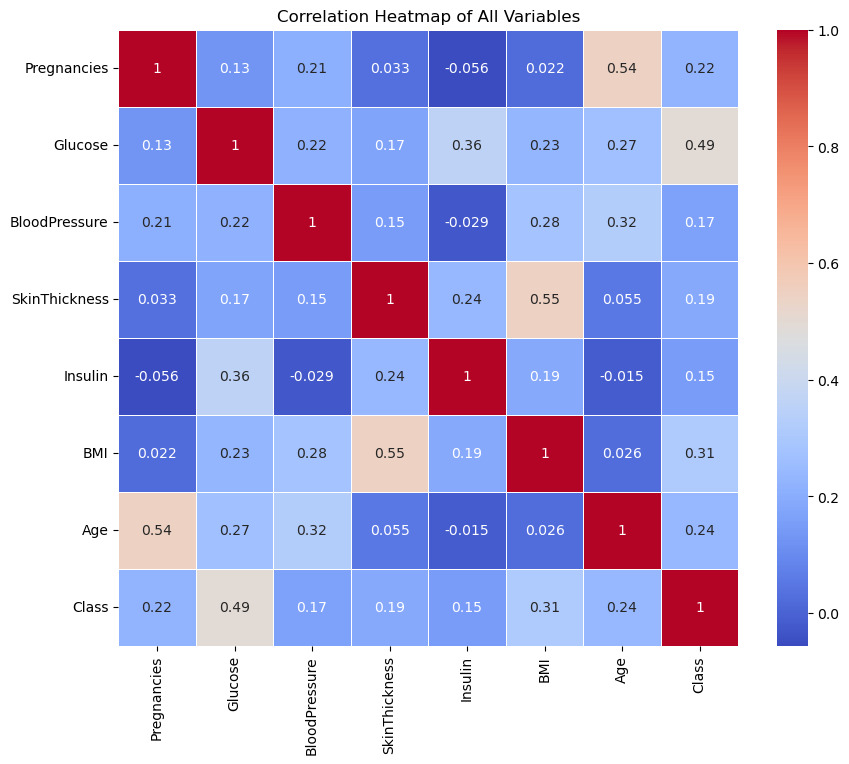

In [36]:
# Create a heatmap to examine the correlation between all variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Variables')
plt.show()

### Mining Questions:

In [37]:
# Q3: How many people in this dataset have skin thickness that is more than 80mm?
(df['SkinThickness'] > 80).sum()

1

In [38]:
# Q5: What is the maximum number of pregnancies in this dataset?
df['Pregnancies'].max()

17

In [39]:
# Q5: Which number of pregnancies has the highest number of people in this dataset?
df['Pregnancies'].value_counts().idxmax()

1

In [40]:
# Q5: What type of skewness is observed in the pregnancies variable?
df['Pregnancies'].skew()

0.9016739791518588

In [41]:
# Q6: Considering the BMI variable's mean and median, what type of skewness is expected to be seen in the BMI variable?
df['BMI'].mean()

32.45091145833333

In [42]:
df['BMI'].median()

32.0

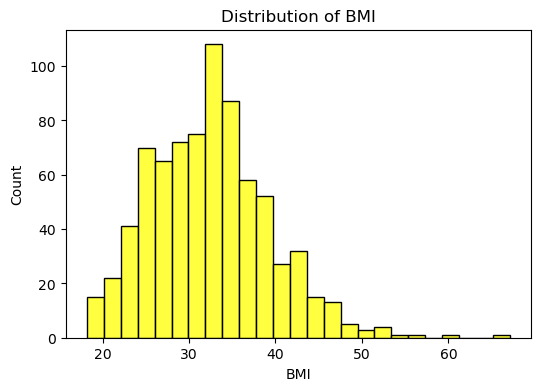

In [43]:
# Q6: - Does the plotting of BMI indicate the same type of skewness?
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='BMI', color='yellow')
plt.title('Distribution of BMI')
plt.show()

In [44]:
# Q7: Are most people diabetic in this dataset?
df['Class'].value_counts()

Class
0    500
1    268
Name: count, dtype: int64

### End of Final Exam.